Entradas: erro e variacaoErro  
Constantes: tempExterna, cargaTermica  
Saída: sistema_crac  


Motor de Inferˆencia Mamdani
2.7.1 Processo de Inferˆencia
O m´etodo Mamdani consiste em quatro etapas principais:
1. Fuzzifica¸c˜ao: Convers˜ao de entradas crisp em graus de pertinˆencia
2. Avalia¸c˜ao de Regras: C´alculo da ativa¸c˜ao de cada regra
3. Agrega¸c˜ao: Combina¸c˜ao das sa´ıdas de todas as regras ativas
4. Defuzzifica¸c˜ao: Convers˜ao da sa´ıda fuzzy em valor crisp

In [12]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import time
import matplotlib.pyplot as plt

In [13]:
tol_erro = 2
passo_erro = 0.1
passo_var_erro = 0.01


In [14]:
# Motor de Inferência Mamdani
def mandani():
    # Definindo universo de discurso das variáveis de entrada e saída
    erro = ctrl.Antecedent(np.arange(-16, 16+passo_erro, passo_erro), 'erro')
    variacao_erro =ctrl.Antecedent(np.arange(-2*tol_erro, 2*tol_erro+passo_var_erro, passo_var_erro), 'variacao_erro')
    sistema_crac =ctrl.Consequent(np.arange(0, 101, 1), 'sistema_crac')

    # Função de pertinência do erro
    erro['MN'] = fuzz.trapmf(erro.universe, [-16, -16, -2*tol_erro,-tol_erro])
    erro['PN'] = fuzz.trimf(erro.universe, [-2*tol_erro,-tol_erro,0])
    erro['ZE'] = fuzz.trimf(erro.universe, [-tol_erro, 0, tol_erro])
    erro['PP'] = fuzz.trimf(erro.universe, [0, tol_erro, 2*tol_erro])
    erro['MP'] = fuzz.trapmf(erro.universe,[tol_erro, 2*tol_erro, 16+passo_erro,16+passo_erro])

    # Função de pertinência da variação do erro
    variacao_erro['MN'] = fuzz.trapmf(variacao_erro.universe, [-2*tol_erro, -2*tol_erro, -2*tol_erro/10,-tol_erro/10])
    variacao_erro['PN'] = fuzz.trimf(variacao_erro.universe, [-2*tol_erro/10,-tol_erro/10,0])
    variacao_erro['ZE'] = fuzz.trimf(variacao_erro.universe, [-tol_erro/10, 0, tol_erro/10])
    variacao_erro['PP'] = fuzz.trimf(variacao_erro.universe, [0, tol_erro/10, 2*tol_erro/10])
    variacao_erro['MP'] = fuzz.trapmf(variacao_erro.universe,[tol_erro/10, 2*tol_erro/10, 2*tol_erro+passo_var_erro,2*tol_erro+passo_var_erro])

    # Função de pertinância do sistema CRAC
    sistema_crac['MB'] = fuzz.trimf(sistema_crac.universe, [0,0,25])
    sistema_crac['B'] = fuzz.trimf(sistema_crac.universe, [0,25,50])
    sistema_crac['M'] = fuzz.trimf(sistema_crac.universe, [25, 50, 75])
    sistema_crac['A'] = fuzz.trimf(sistema_crac.universe, [50, 75, 101])
    sistema_crac['MA'] = fuzz.trimf(sistema_crac.universe, [75, 101, 101])

    # Regras
    regra1 = ctrl.Rule(erro['MN']& variacao_erro['MN'], sistema_crac['MB'])
    regra2 = ctrl.Rule(erro['PN']& variacao_erro['MN'], sistema_crac['MB'])
    regra3 = ctrl.Rule(erro['ZE']& variacao_erro['MN'], sistema_crac['B'])
    regra4 = ctrl.Rule(erro['PP']& variacao_erro['MN'], sistema_crac['M'])
    regra5 = ctrl.Rule(erro['MP']& variacao_erro['MN'], sistema_crac['M'])
    regra6 = ctrl.Rule(erro['MN']& variacao_erro['PN'], sistema_crac['MB'])
    regra7 = ctrl.Rule(erro['PN']& variacao_erro['PN'], sistema_crac['B'])
    regra8 = ctrl.Rule(erro['ZE']& variacao_erro['PN'], sistema_crac['B'])
    regra9 = ctrl.Rule(erro['PP']& variacao_erro['PN'], sistema_crac['M'])
    regra10 = ctrl.Rule(erro['MP']& variacao_erro['PN'], sistema_crac['A'])
    regra11 = ctrl.Rule(erro['MN']& variacao_erro['ZE'], sistema_crac['MB'])
    regra12 = ctrl.Rule(erro['PN']& variacao_erro['ZE'], sistema_crac['B'])
    regra13 = ctrl.Rule(erro['ZE']& variacao_erro['ZE'], sistema_crac['B'])
    regra14 = ctrl.Rule(erro['PP']& variacao_erro['ZE'], sistema_crac['M'])
    regra15 = ctrl.Rule(erro['MP']& variacao_erro['ZE'], sistema_crac['A'])
    regra16 = ctrl.Rule(erro['MN']& variacao_erro['PP'], sistema_crac['B'])
    regra17 = ctrl.Rule(erro['PN']& variacao_erro['PP'], sistema_crac['M'])
    regra18 = ctrl.Rule(erro['ZE']& variacao_erro['PP'], sistema_crac['M'])
    regra19 = ctrl.Rule(erro['PP']& variacao_erro['PP'], sistema_crac['A'])
    regra20 = ctrl.Rule(erro['MP']& variacao_erro['PP'], sistema_crac['MA'])
    regra21 = ctrl.Rule(erro['MN']& variacao_erro['MP'], sistema_crac['M'])
    regra22 = ctrl.Rule(erro['PN']& variacao_erro['MP'], sistema_crac['M'])
    regra23 = ctrl.Rule(erro['ZE']& variacao_erro['MP'], sistema_crac['A'])
    regra24 = ctrl.Rule(erro['PP']& variacao_erro['MP'], sistema_crac['MA'])
    regra25 = ctrl.Rule(erro['MP']& variacao_erro['MP'], sistema_crac['MA'])

    sistema_crac_ctrl = ctrl.ControlSystem([regra1, regra2, regra3,regra4,regra5,regra6, regra7, regra8,regra9,regra10,regra11, regra12, regra13,regra14,regra15,regra16, regra17, regra18,regra19,regra20,regra21, regra22, regra23,regra24,regra25])
    potencia = ctrl.ControlSystemSimulation(sistema_crac_ctrl)

    return erro, variacao_erro, sistema_crac, potencia

In [15]:
def mostrar_graficos(erro, variacao_erro, sistema_crac):
    erro.view()
    variacao_erro.view()
    sistema_crac.view()

In [16]:
def sistema_miso(erro, variacao_erro, potencia):
    # Cálculo da potência
    potencia.input['erro'] = erro
    potencia.input['variacao_erro'] = variacao_erro
    potencia.compute()
    return potencia.output['sistema_crac']

In [17]:
def funcao_transferencia(temp_atual, potencia, carga_termica, temp_externa):
    return 0.9*temp_atual - 0.08*potencia + 0.05*carga_termica + 0.02*temp_externa + 3.5

In [18]:
def controlador_fuzzy(set_point, temp_atual, carga_termica, temp_externa, erro_anterior, potencia):
    erro_atual = temp_atual - set_point
    variacao_erro = erro_atual - erro_anterior
    
    potencia_atual = sistema_miso(erro_atual, variacao_erro, potencia)

    temp_atual = funcao_transferencia(temp_atual, potencia_atual, carga_termica, temp_externa)

    return temp_atual, erro_atual

Mostrar gráfico das funções de pertinência

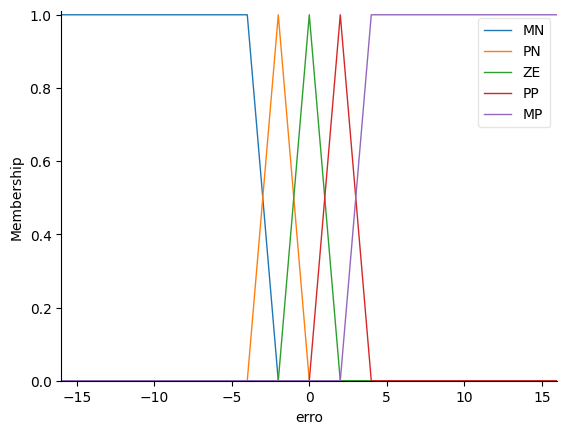

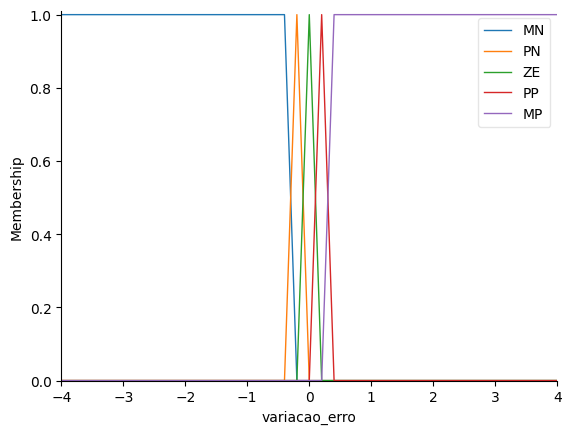

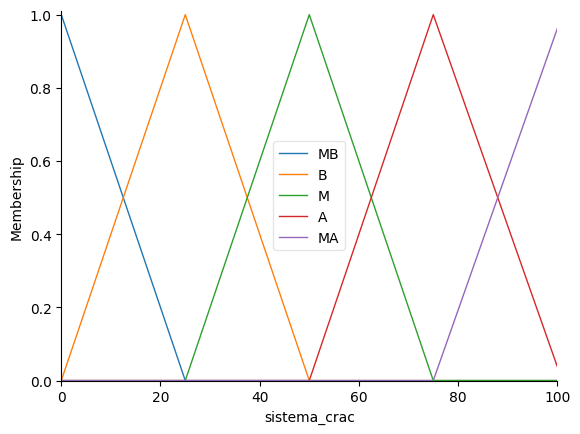

In [19]:
erro, variacao_erro, sistema_crac, potencia = mandani()
mostrar_graficos(erro, variacao_erro, sistema_crac)

Simular um cenário  
Temperatura inicial = 22  
Set Point = 32  
Temperatura Externa = 25  
Carga Térmica = 40  

In [20]:
temp_inicial = 32
set_point = 22
temp_externa = 25
carga_termica = 40
erro_inicial = set_point - temp_inicial

Gráficos apenas para demonstração  
No projeto em si temos que mandar pro broker e gerar o gráfico por lá

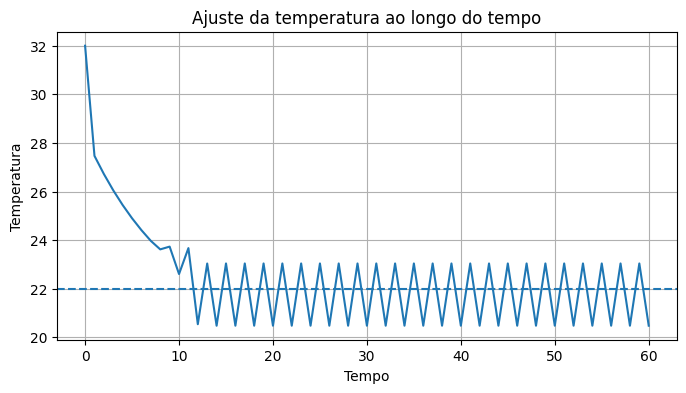

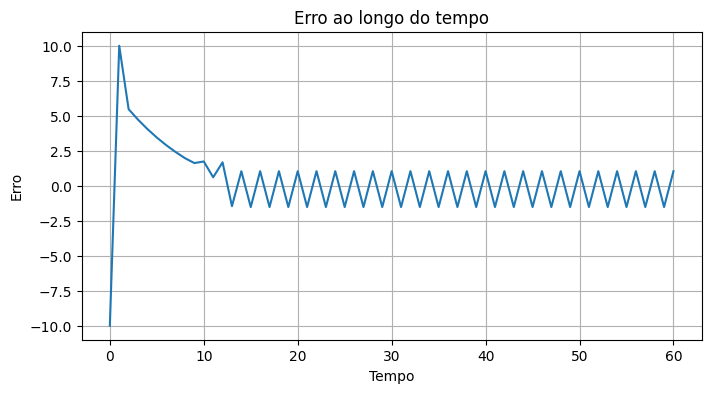

In [21]:
passos = 60
tempo = np.arange(passos+1)
temp = np.zeros(passos+1)
erro = np.zeros(passos+1)
temp[0] = temp_inicial
erro[0] = set_point-temp_inicial
for t in range(passos):
    temp[t+1], erro[t+1] = controlador_fuzzy(set_point, temp[t], carga_termica, temp_externa, erro[t], potencia)

plt.figure(figsize=(8, 4))
plt.plot(tempo, temp)
plt.axhline(y=set_point, linestyle="--")
plt.title("Ajuste da temperatura ao longo do tempo")
plt.xlabel("Tempo")
plt.ylabel("Temperatura")
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 4))
plt.plot(tempo, erro)
plt.title("Erro ao longo do tempo")
plt.xlabel("Tempo")
plt.ylabel("Erro")
plt.grid(True)
plt.show()

In [22]:
temp_atual = temp_inicial
erro_atual = set_point - temp_inicial
print(f"{temp_atual} - {erro_atual}")
while True:
    temp_atual, erro_atual = controlador_fuzzy(set_point, temp_atual, carga_termica, temp_externa, erro_atual, potencia)
    time.sleep(0.5)
    print(f"{temp_atual} - {erro_atual}")


32 - -10
27.466666666666665 - 10
26.72 - 5.466666666666665
26.048 - 4.719999999999999
25.443199999999997 - 4.047999999999998
24.89888 - 3.4431999999999974
24.408991999999998 - 2.8988799999999983
23.968092799999997 - 2.408991999999998
23.618515712341797 - 1.9680927999999973
23.732194551919328 - 1.6185157123417966
22.604449570715023 - 1.7321945519193278
23.67054860678184 - 0.6044495707150226
20.538869062401126 - 1.6705486067818391
23.035695290222485 - -1.461130937598874


KeyboardInterrupt: 